# Creating Functions

---

### Objectives

- Define a function that takes parameters
- Return a value from a function
- Test and debug a function
- Set default values for function parameters
- Explain why we should divide programs into small, single-purpose functions

---

### Background

Instead of repeating code:

```python
fahrenheit_val = 99
celsius_val = ((fahrenheit_val - 32) * (5/9))

fahrenheit_val2 = 43
celsius_val2 = ((fahrenheit_val2 - 32) * (5/9))
```

We can use functions to package reusable code.

---

In [58]:
# Write the code here

#### Composing Functions

Define a function to convert Fahrenheit to Celsius:

In [3]:
# Write the function definition here

# void functions do not return any value

def fahr_to_celcius(temp):
    celcius = ((temp - 32) * (5/9))
    return celcius

result = fahr_to_celcius(32)
print("Result is:", result)

Result is: 0.0


Usage:

In [5]:
# Write the code to use the function here

print("boiling point of water:", fahr_to_celcius(212), "C")

boiling point of water: 100.0 C


Define a function to convert Celsius to Kelvin:

In [6]:
# Write the code here

def celcius_to_kelvin(temp_c):
    kelvin = temp_c + 273.15
    return kelvin


Usage:

In [7]:
# Write the code to use the function here
print("freezing point of water in kelvin:", celcius_to_kelvin(0))

freezing point of water in kelvin: 273.15


Define a function to convert Fahrenheit to Kelvin:

In [8]:
# Write the code here

def fahr_to_kelvin(temp_f):
    # 1. Convert Farh to Celcius
    temp_c = fahr_to_celcius(temp_f)
    # 2. Conver Celcius to Kelvin
    temp_k = celcius_to_kelvin(temp_c)
    
    return temp_k


Usage:

In [9]:
# Write the code to use the function here
print("the boiling point of water in Kelvin:", fahr_to_kelvin(212))


the boiling point of water in Kelvin: 373.15


#### Variable Scope

- Local variables exist only within functions
- Global variables can be accessed inside functions

In [11]:
# Write the code examples here

def fahr_to_kelvin():
    # 1. Convert Farh to Celcius
    temp_c = fahr_to_celcius(temp_f)
    # 2. Conver Celcius to Kelvin
    temp_k = celcius_to_kelvin(temp_c)
    
    return temp_k

temp_f = 212 # global variable

print(fahr_to_kelvin())

print("Temp C", temp_c)

373.15


NameError: name 'temp_c' is not defined

## Tidying up

Create functions for visualization and problem detection:

```python
def visualize(filename):
    # ... (visualization code)

def detect_problems(filename):
    # ... (problem detection code)

for filename in filenames[:3]:
    print(filename)
    visualize(filename)
    detect_problems(filename)
```

In [12]:
# Write the code here

import numpy as np
from matplotlib import pyplot as plt

def visualize(filename):
    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel("average")
    axes1.plot(np.mean(data, axis = 0))

    axes2.set_ylabel("max")
    axes2.plot(np.amax(data, axis = 0))

    axes3.set_ylabel("min")
    axes3.plot(np.amin(data, axis = 0))

    fig.tight_layout()
    plt.show()

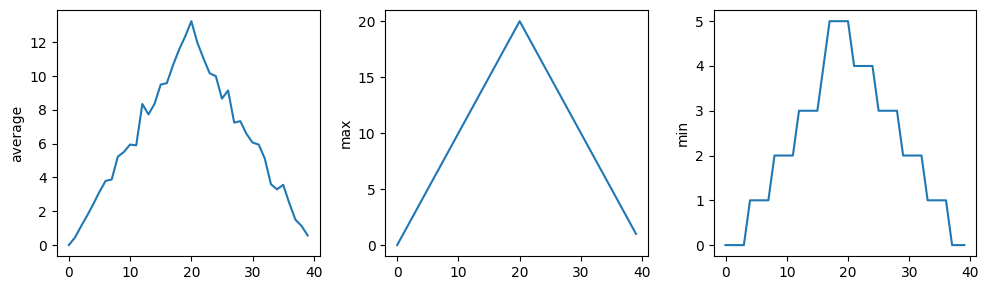

In [15]:
visualize("./data/inflammation-01.csv")

In [18]:
def detect_problems(filename):
    data = np.loadtxt(fname=filename, delimiter=",")

    if np.amax(data, axis=0)[0] == 0 and np.amax(data, axis=0)[20] == 20:
        print("Suspicious looking maxima!")
    elif np.sum(np.amin(data, axis=0)) == 0:
        print("Minima add up to zero")
    else:
        print("Seems okay!")
    
 

In [19]:
detect_problems("./data/inflammation-01.csv")

Suspicious looking maxima! 0.0 20.0


./data\inflammation-01.csv


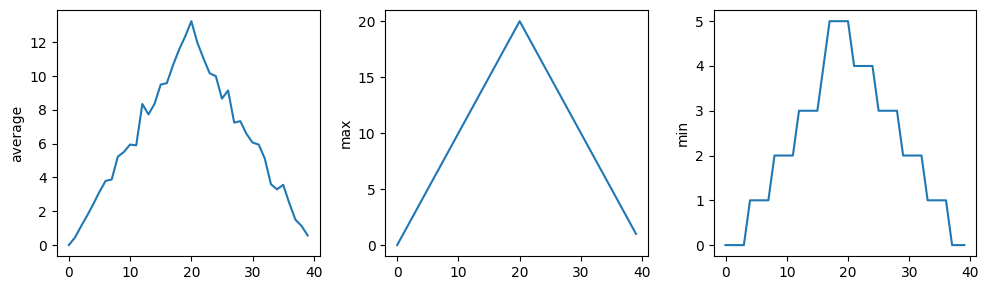

Suspicious looking maxima! 0.0 20.0
./data\inflammation-02.csv


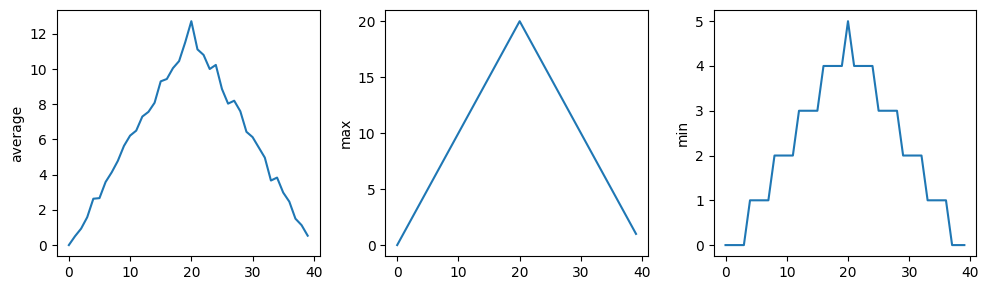

Suspicious looking maxima! 0.0 20.0
./data\inflammation-03.csv


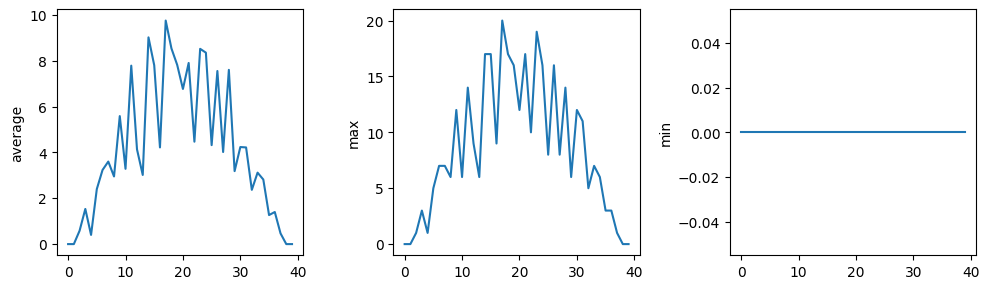

Minima add up to zero
./data\inflammation-04.csv


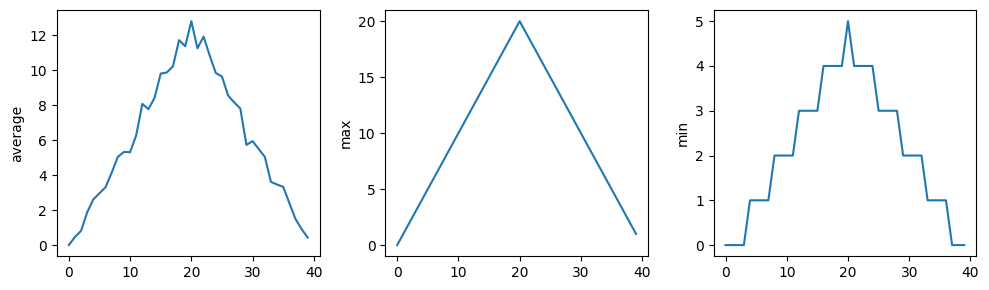

Suspicious looking maxima! 0.0 20.0
./data\inflammation-05.csv


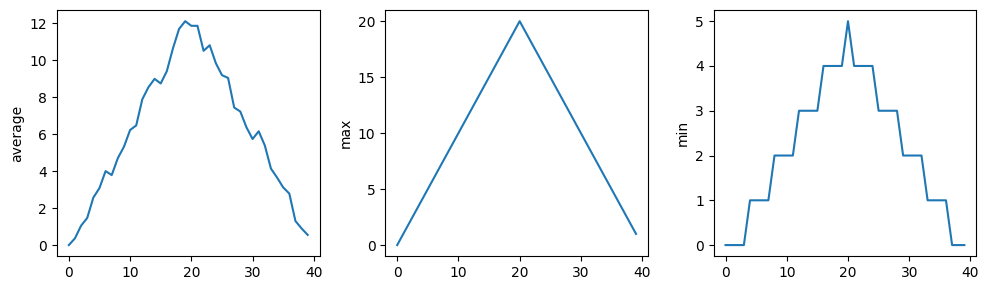

Suspicious looking maxima! 0.0 20.0
./data\inflammation-06.csv


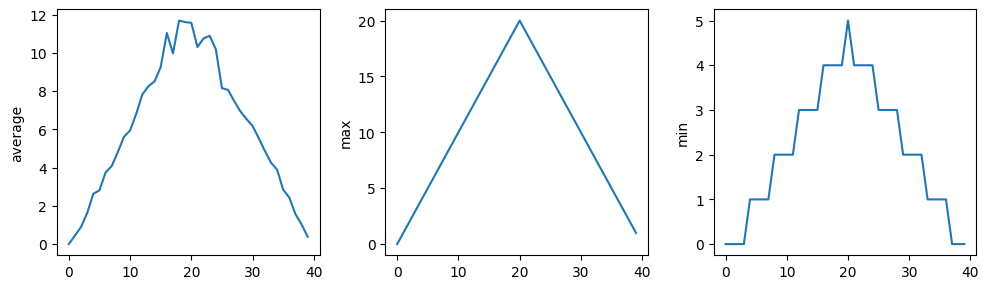

Suspicious looking maxima! 0.0 20.0
./data\inflammation-07.csv


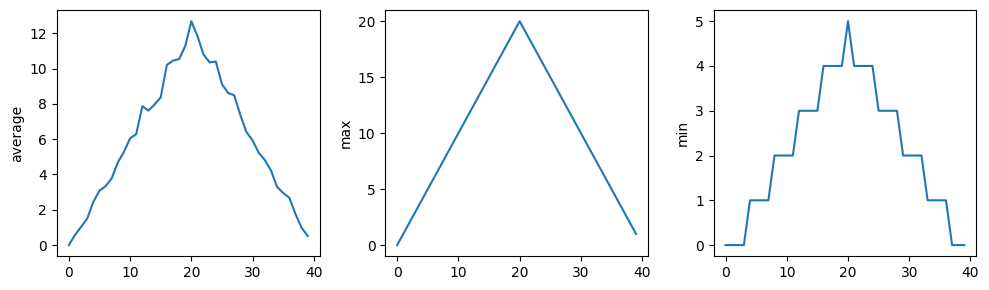

Suspicious looking maxima! 0.0 20.0
./data\inflammation-08.csv


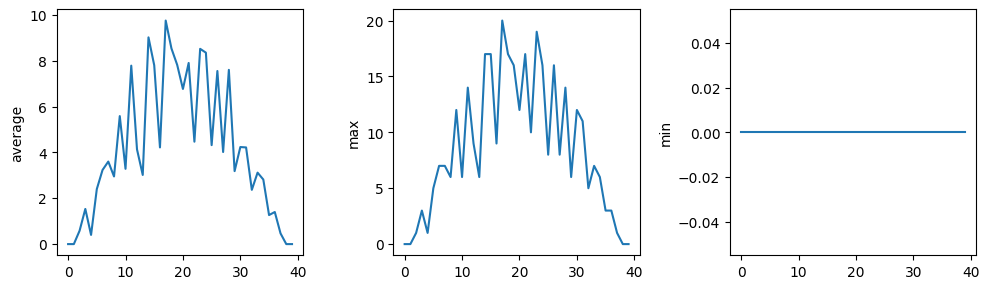

Minima add up to zero
./data\inflammation-09.csv


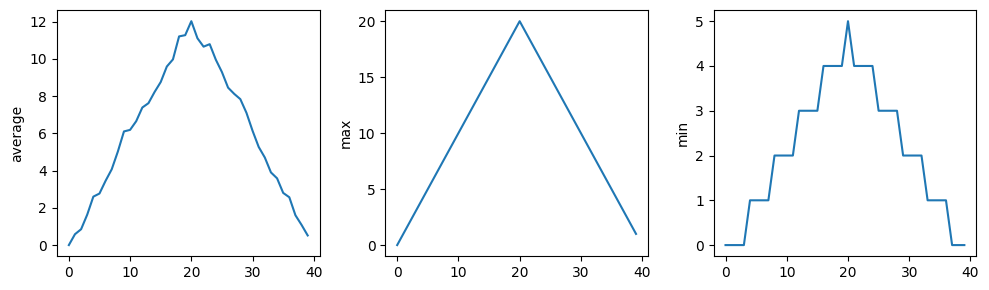

Suspicious looking maxima! 0.0 20.0
./data\inflammation-10.csv


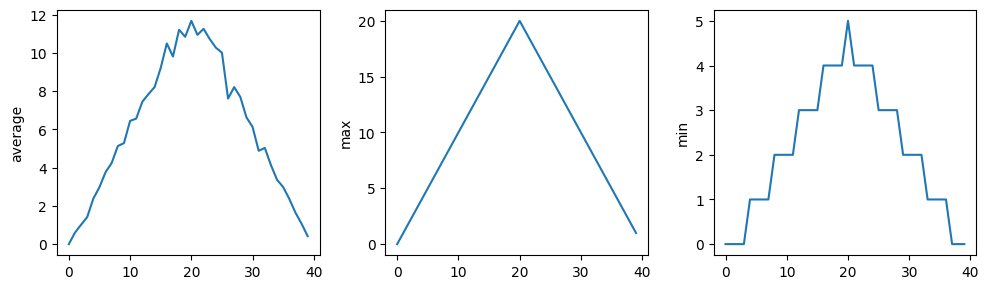

Suspicious looking maxima! 0.0 20.0
./data\inflammation-11.csv


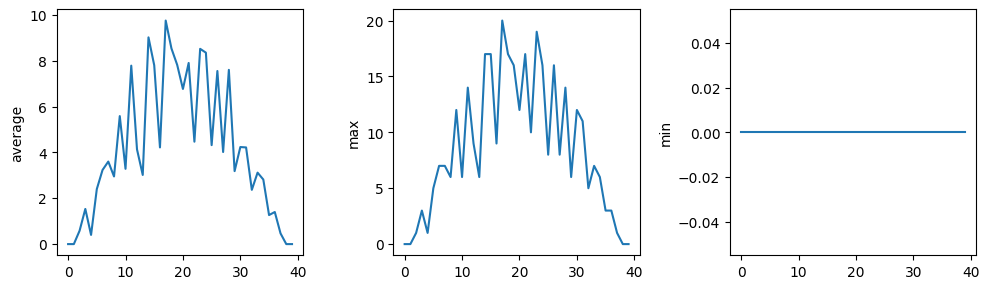

Minima add up to zero
./data\inflammation-12.csv


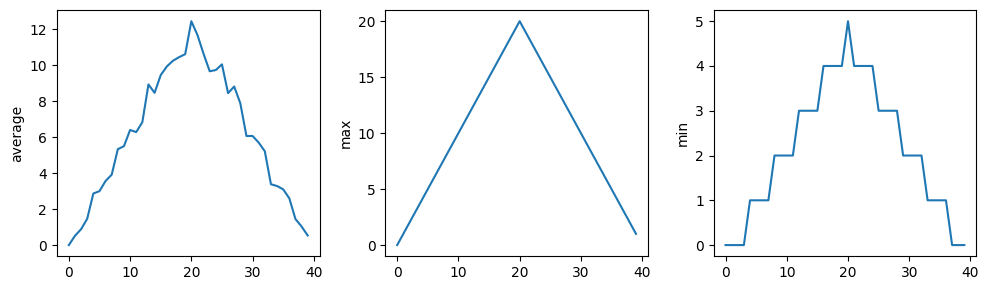

Suspicious looking maxima! 0.0 20.0


In [21]:
import glob

filenames = sorted(glob.glob("./data/inflammation-*.csv"))
for filename in filenames:
    print(filename)
    visualize(filename)
    detect_problems(filename)


#### Testing and Documenting

Example function:

In [22]:
import numpy # If not yet import
def offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value

Test with:

In [23]:
# Write the code for testing the function
z = numpy.zeros((2, 3))
z

array([[0., 0., 0.],
       [0., 0., 0.]])

In [24]:
print(offset_mean(z, 0))

[[0. 0. 0.]
 [0. 0. 0.]]


In [27]:
z = numpy.array([5, 5, 10, 5, 5])
z

array([ 5,  5, 10,  5,  5])

In [28]:
print(offset_mean(z, 0))

[-1. -1.  4. -1. -1.]


In [30]:
data = numpy.loadtxt(fname="./data/inflammation-01.csv", delimiter=",")

print(offset_mean(data, 0))

[[-6.14875 -6.14875 -5.14875 ... -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ... -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ... -4.14875 -5.14875 -5.14875]
 ...
 [-6.14875 -5.14875 -5.14875 ... -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ... -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ... -5.14875 -5.14875 -6.14875]]


In [31]:
print("Original min, mean and max :", numpy.amin(data), numpy.mean(data), numpy.amax(data))

Original min, mean and max : 0.0 6.14875 20.0


In [32]:
offset_data = offset_mean(data, 0)

print("After offset min, mean and max :", 
      numpy.amin(offset_data), 
      numpy.mean(offset_data), 
      numpy.amax(offset_data))

After offset min, mean and max : -6.14875 2.842170943040401e-16 13.85125


In [34]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding=None, max_rows=None, *, quotechar=None, like=None)
    Load data from a text file.

    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return bytes or strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    c

Add documentation:

In [69]:
# Rewrite the code for the 'offset_mean' here with the doc strings 

Use `help(offset_mean)` to view documentation.

#### Defining Defaults

Add default parameter:

In [70]:
# Write the code here

#### Readable functions

Compare the functions `s()` and `std_dev` below

In [71]:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value
    sample_mean = sample_sum / len(sample)
    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)
    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))

In [72]:
# Sample codes here

### Exercises

1. Combining Strings
2. Return versus print
3. Selecting Characters From Strings
4. Rescaling an Array
5. Testing and Documenting Your Function
6. Defining Defaults
7. Variables Inside and Outside Functions
8. Mixing Default and Non-Default Parameters
9. Readable Code

---

##### 1. Combining Strings

Write a function called `fence` that takes two parameters:
- `original`
- `wrapper`

It should return a new string with the `wrapper` character at the beginning and end of the `original`.

Example usage:
```python
print(fence('name', '*'))
```

`*name*`

In [73]:
# Write the function code here

#### 2. Return versus print

Consider this function:
```python
def add(a, b):
    print(a + b)
```

What will we see if we execute:
```python
A = add(7, 3)
print(A)
```

Think about the difference between `return` and `print`.

In [74]:
# Code samples

#### 3. Selecting Characters From Strings

Write a function called `outer` that returns a string made up of just the first and last characters of its input.

Example usage:
```python
print(outer('helium'))
```

`hm`


In [75]:
# Write the function code here

#### 4. Rescaling an Array

Write a function `rescale` that:
- Takes an array as input
- Returns a corresponding array of values scaled to lie in the range 0.0 to 1.0

Hint: If L and H are the lowest and highest values in the original array, then the replacement for a value v should be (v-L) / (H-L).


In [76]:
# Write the function code here

#### 5. Testing and Documenting Your Function

1. Use `numpy.arange` and `numpy.linspace` to generate test values for your `rescale` function.
2. Test your function with these values.
3. Add a docstring to explain what your function does.

In [77]:
# Write the code here

#### 6. Defining Defaults

Rewrite the `rescale` function so that:
- It scales data to lie between 0.0 and 1.0 by default
- Allows the caller to specify lower and upper bounds if they want

Compare your implementation with your neighbor's.

In [78]:
# Write your code here

#### 7. Variables Inside and Outside Functions

What does this code display when run, and why?

```python
f = 0
k = 0

def f2k(f):
    k = ((f - 32) * (5.0 / 9.0)) + 273.15
    return k

print(f2k(8))
print(f2k(41))
print(f2k(32))
print(k)
```

In [79]:
# Write the code here

#### 8. Mixing Default and Non-Default Parameters

Given this code:

```python
def numbers(one, two=2, three, four=4):
    n = str(one) + str(two) + str(three) + str(four)
    return n

print(numbers(1, three=3))
```

What do you expect will be printed? What is actually printed?

In [80]:
# Write the code here

#### 9. Readable Code

1. Choose a function you wrote for one of the previous exercises.
2. Revise it to make the code more readable.
3. Collaborate with a neighbor to critique each other's functions.
4. Discuss how your function implementations could be further improved for readability.

In [81]:
# Write your code here